In [1]:
from isweep import *

In [125]:
# tab=pd.read_csv('concat.summary.100k.tsv',sep='\t')
# tab=pd.read_csv('concat.summary.bottle.tsv',sep='\t')
tab=pd.read_csv('concat.summary.central.bottle.tsv',sep='\t')
# tab=pd.read_csv('../summary.tsv',sep='\t')
sub=tab[tab['ISWEEPRANK']!=0]

In [126]:
sub.head()

,POS,AAF,SELCOEF,ISWEEPSELCOEF,ISWEEPRANK,ISWEEPAAF,ISWEEPLOC,ISWEEPRANKMEAN,ISWEEPAAFMEAN,ISWEEPLOCMEAN,ISWEEPRANKMODE,ISWEEPAAFMODE,ISWEEPLOCMODE,ISWEEPRANKMEDIAN,ISWEEPAAFMEDIAN,ISWEEPLOCMEDIAN
0,3999999,0.7942,0.035,0.032065,1,0.676986,4019945.20,21,0.744328,4119094.04,23,0.742020,4121353.22,23,0.742020,4121353.22
1,3999999,0.3339,0.035,0.034707,1,0.280468,3885974.72,1,0.277412,3867149.74,35,0.262670,3732347.90,1,0.277350,3855821.84
2,3999999,0.8675,0.035,0.035768,1,0.823082,3992263.46,23,0.801244,3911048.54,32,0.747472,3865678.92,33,0.750154,3869882.16
3,3999999,0.7157,0.035,0.033692,1,0.608040,4147582.70,23,0.623344,4132458.92,4,0.617786,4137714.98,46,0.605250,4155658.72
4,3999999,0.4206,0.035,0.036822,1,0.405566,4056869.14,1,0.398206,4033588.46,1,0.401096,4045121.10,9,0.407556,3965658.56


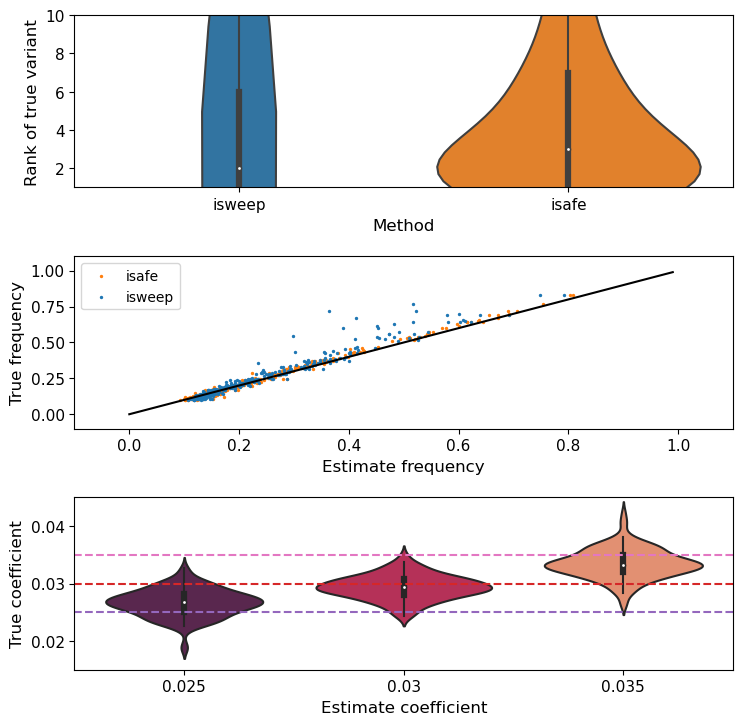

In [124]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8.5,8.5))

fs=12
ls=11

ax[0].tick_params(labelsize=ls)
ax[1].tick_params(labelsize=ls)
ax[2].tick_params(labelsize=ls)
plt.subplots_adjust(hspace=0.4,wspace=0.2)

# currplt=ax[0,0]
ax[1].scatter(sub['ISAFEAAF'],sub['AAF'],color='tab:orange',s=2,label='isafe')
ax[1].scatter(sub['ISWEEPAAF'],sub['AAF'],color='tab:blue',s=2,label='isweep')
ax[1].set_xlabel('Estimate frequency', fontsize=fs)
ax[1].set_ylabel('True frequency', fontsize=fs)
ticks=[i*0.01 for i in range(0,100)]
ax[1].plot(ticks,ticks,color='black')
ax[1].legend()
ax[1].set_ylim(-0.1,1.1)
ax[1].set_xlim(-0.1,1.1)

rownum=sub.shape[0]
m1=['isweep' for r in range(rownum)]
m2=['isafe' for r in range(rownum)]
m=m1+m2
v1=sub['ISWEEPRANK']
v2=sub['ISAFERANK']
v=pd.concat((v1,v2))
dictionary={'RANK':v,'METHOD':m}
rtab=pd.DataFrame(dictionary)
sns.violinplot(data=rtab,y='RANK',x='METHOD',s=2,cut=1,ax=ax[0])
ax[0].set_xlabel('Method', fontsize=fs)
ax[0].set_ylabel('Rank of true variant', fontsize=fs)
ax[0].set_ylim(1,10)

sns.violinplot(data=sub,x='SELCOEF',y='ISWEEPSELCOEF',ax=ax[2],palette='rocket')
ax[2].set_ylim(0.015,0.045)
ax[2].set_ylabel('True coefficient',fontsize=fs)
ax[2].set_xlabel('Estimate coefficient',fontsize=fs)
ax[2].axhline(0.025,linestyle='dashed',color='tab:purple')
ax[2].axhline(0.030,linestyle='dashed',color='tab:red')
ax[2].axhline(0.035,linestyle='dashed',color='tab:pink')

fig.savefig('panel-isweep-isafe-100k.png',dpi=300)

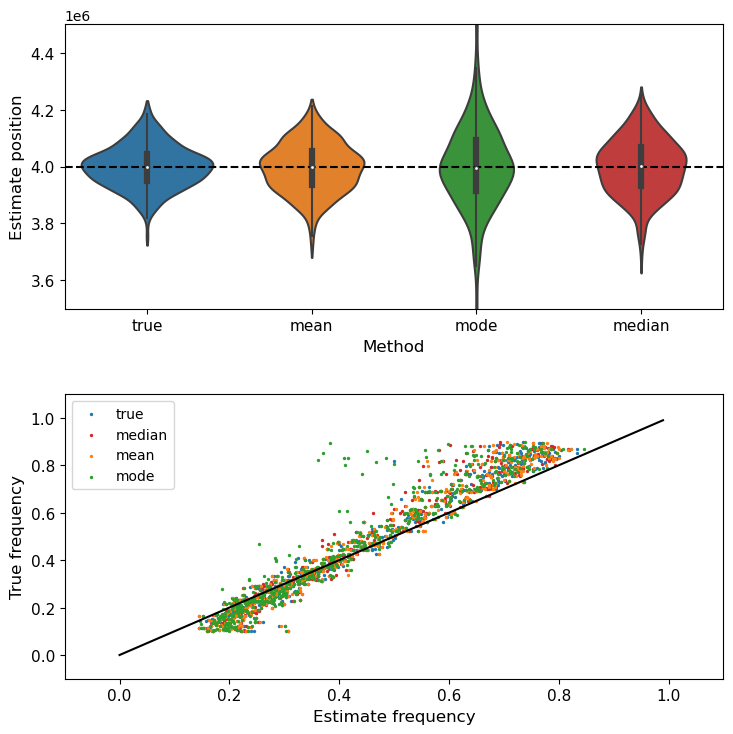

In [127]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8.5,8.5))
# fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8.5,11))

fs=12
ls=11

ax[0].tick_params(labelsize=ls)
ax[1].tick_params(labelsize=ls)
plt.subplots_adjust(hspace=0.3,wspace=0.2)

# currplt=ax[0,0]
ax[1].scatter(sub['ISWEEPAAF'],sub['AAF'],s=2,label='true')
ax[1].scatter(sub['ISWEEPAAFMEDIAN'],sub['AAF'],s=2,label='median',color='tab:red')
ax[1].scatter(sub['ISWEEPAAFMEAN'],sub['AAF'],s=2,label='mean',color='tab:orange')
ax[1].scatter(sub['ISWEEPAAFMODE'],sub['AAF'],s=2,label='mode',color='tab:green')
ax[1].set_xlabel('Estimate frequency', fontsize=fs)
ax[1].set_ylabel('True frequency', fontsize=fs)
ticks=[i*0.01 for i in range(0,100)]
ax[1].plot(ticks,ticks,color='black')
ax[1].legend()
ax[1].set_ylim(-0.1,1.1)
ax[1].set_xlim(-0.1,1.1)

rownum=sub.shape[0]
m1=['true' for r in range(rownum)]
m2=['mean' for r in range(rownum)]
m3=['mode' for r in range(rownum)]
m4=['median' for r in range(rownum)]
m=m1+m2+m3+m4
v1=sub['ISWEEPLOC']
v2=sub['ISWEEPLOCMEAN']
v3=sub['ISWEEPLOCMODE']
v4=sub['ISWEEPLOCMEDIAN']
v=pd.concat((v1,v2,v3,v4))
dictionary={'LOC':v,'METHOD':m}
rtab=pd.DataFrame(dictionary)
sns.violinplot(data=rtab,y='LOC',x='METHOD',s=2,cut=1,ax=ax[0])
ax[0].set_xlabel('Method', fontsize=fs)
ax[0].set_ylabel('Estimate position', fontsize=fs)
ax[0].set_ylim(3_500_000,4_500_000)
ax[0].axhline(4_000_000,color='k',linestyle='dashed')

fig.savefig('panel-isweep-central-bottle.png',dpi=300)

Text(0, 0.5, 'Rank of true sweep variant')

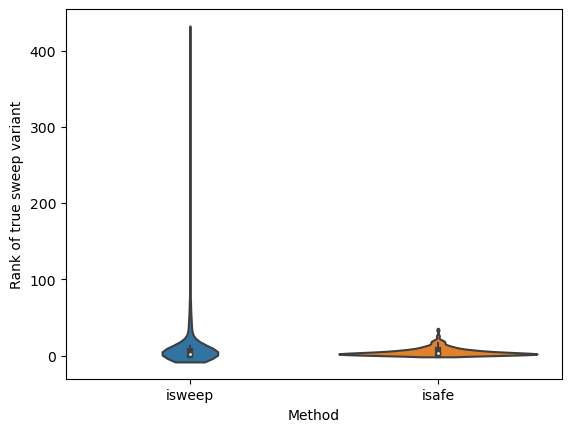

In [24]:
rownum=sub.shape[0]
m1=['isweep' for r in range(rownum)]
m2=['isafe' for r in range(rownum)]
m=m1+m2
v1=sub['ISWEEPRANK']
v2=sub['ISAFERANK']
v=pd.concat((v1,v2))
dictionary={'RANK':v,'METHOD':m}
rtab=pd.DataFrame(dictionary)
sns.violinplot(data=rtab,y='RANK',x='METHOD',s=2,cut=1)
plt.xlabel('Method')
plt.ylabel('Rank of true sweep variant')

Text(0, 0.5, 'Estimate of sweep variant position')

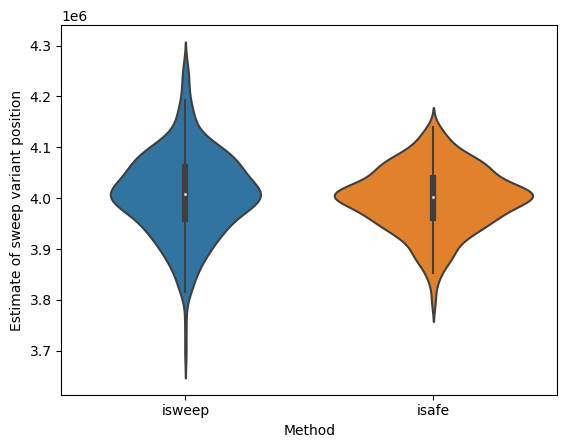

In [25]:
rownum=sub.shape[0]
m1=['isweep' for r in range(rownum)]
m2=['isafe' for r in range(rownum)]
m=m1+m2
v1=sub['ISWEEPLOC']
v2=sub['ISAFELOC']
v=pd.concat((v1,v2))
dictionary={'LOC':v,'METHOD':m}
rtab=pd.DataFrame(dictionary)
sns.violinplot(data=rtab,y='LOC',x='METHOD',s=2)
plt.xlabel('Method')
plt.ylabel('Estimate of sweep variant position')

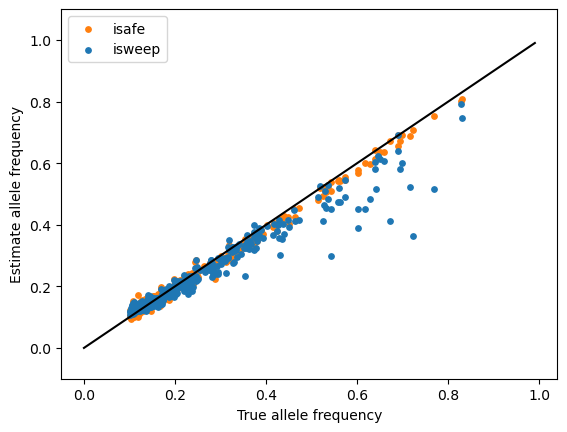

In [27]:
plt.scatter(sub['AAF'],sub['ISAFEAAF'],color='tab:orange',s=15,label='isafe')
plt.scatter(sub['AAF'],sub['ISWEEPAAF'],color='tab:blue',s=15,label='isweep')
plt.xlabel('True allele frequency')
plt.ylabel('Estimate allele frequency')
ticks=[i*0.01 for i in range(0,100)]
plt.plot(ticks,ticks,color='black')
plt.legend()
plt.ylim(-0.1,1.1)
plt.clim(-0.1,1.1)
# plt.savefig('compare-aaf.png',dpi=300)

Text(0, 0.5, 'isweep')

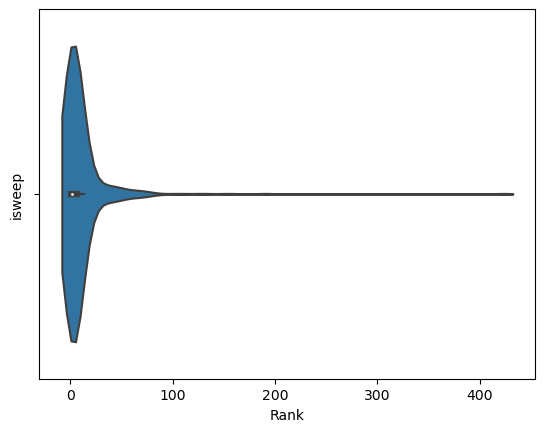

In [21]:
sns.violinplot(data=sub,x='ISWEEPRANK',s=2,color='tab:blue',cut=1)
# sns.swarmplot(data=sub,x='ISWEEPRANK',s=2,color='tab:blue')
plt.xlabel('Rank')
plt.ylabel('isweep')
# plt.savefig('isweep-rank.png',dpi=300)

Text(0, 0.5, 'isafe')

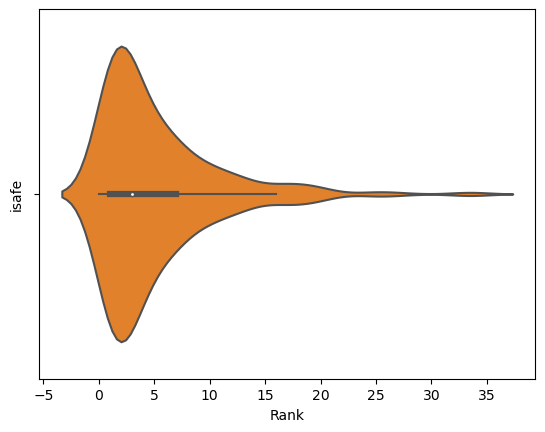

In [9]:
sns.violinplot(data=sub,x='ISAFERANK',s=2,color='tab:orange',trim=True)
# sns.violinplot(data=sub,x='ISAFERANK',s=2,color='tab:blue',cut=1)
# sns.swarmplot(data=sub,x='ISAFERANK',s=2,color='tab:orange')
plt.xlabel('Rank')
plt.ylabel('isafe')
# plt.savefig('isafe-rank.png',dpi=300)

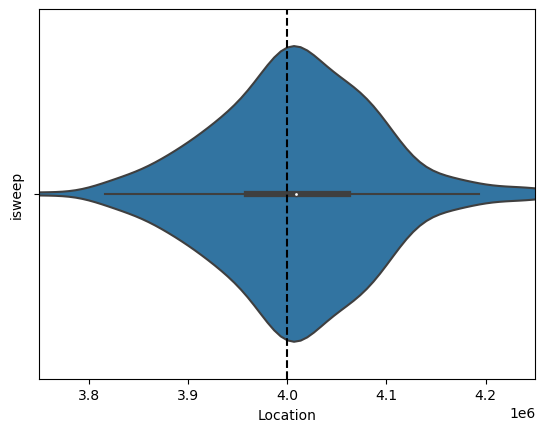

In [10]:
sns.violinplot(data=sub,x='ISWEEPLOC',s=10,color='tab:blue')
plt.xlabel('Location')
plt.ylabel('isweep')
plt.xlim(3_750_000,4_250_000)
plt.axvline(x=4_000_000,color='black',linestyle='dashed')
# plt.savefig('isweep-loc.png',dpi=300)

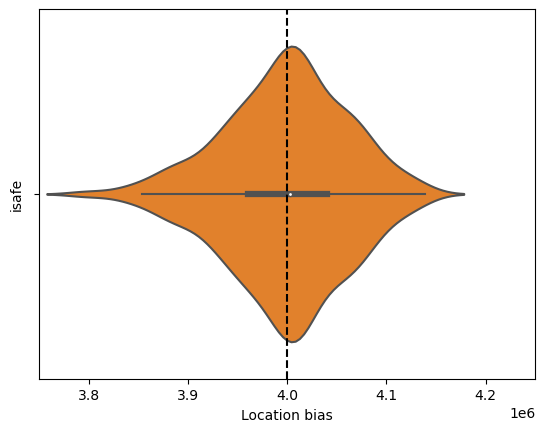

In [11]:
sns.violinplot(data=sub,x='ISAFELOC',s=10,color='tab:orange')
plt.xlabel('Location bias')
plt.ylabel('isafe')
plt.xlim(3_750_000,4_250_000)
plt.axvline(x=4_000_000,color='black',linestyle='dashed')
# plt.savefig('isafe-loc.png',dpi=300)

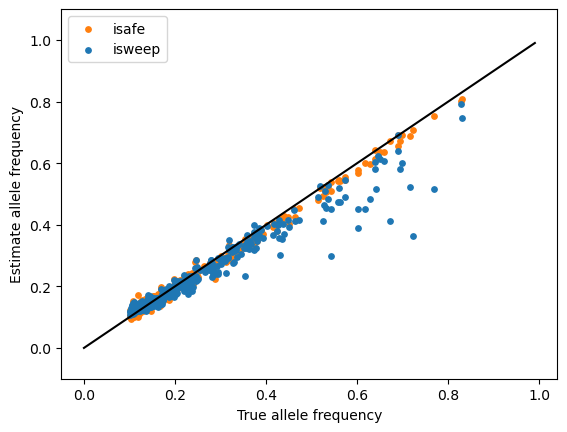

In [12]:
plt.scatter(sub['AAF'],sub['ISAFEAAF'],color='tab:orange',s=15,label='isafe')
plt.scatter(sub['AAF'],sub['ISWEEPAAF'],color='tab:blue',s=15,label='isweep')
plt.xlabel('True allele frequency')
plt.ylabel('Estimate allele frequency')
ticks=[i*0.01 for i in range(0,100)]
plt.plot(ticks,ticks,color='black')
plt.legend()
plt.ylim(-0.1,1.1)
plt.clim(-0.1,1.1)
# plt.savefig('compare-aaf.png',dpi=300)

Text(0.5, 0, 'True selection coefficient')

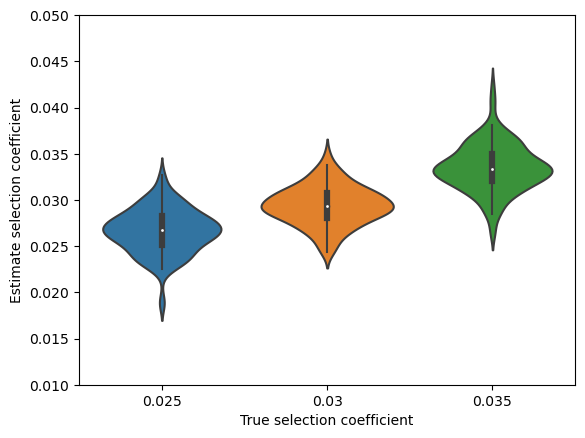

In [13]:
sns.violinplot(data=sub,x='SELCOEF',y='ISWEEPSELCOEF')
plt.ylim(0.01,0.05)
plt.ylabel('Estimate selection coefficient')
plt.xlabel('True selection coefficient')
# plt.savefig('compare-s.png',dpi=300)

In [4]:
tab=pd.read_csv('isweep.inference.tsv',sep='\t')

In [5]:
tab

,BpLocEst,VarFreqEst,SelCoefEst,SelCoefLow,SelCoefUpp,Mendel,TimeSV5Est,TimeSV5Low,TimeSV5Upp,TimeSV2Est,TimeSV2Low,TimeSV2Upp,TimeDeNovoEst,TimeDeNovoLow,TimeDeNovoUpp
0,1.359673e+08,0.655743,0.03158,0.026525,0.036634,a,117,100.0,136.55,147,125.225,177.325,304,201.45,344.875


In [6]:
s=0.03158
p=0.655743
Ne=read_Ne('ibdne.ne')

In [11]:
K=10
J=15
every=[i*10 for i in range(J)]
everylist=[[] for i in range(J)]
for k in range(K):
    a,b,c=walk_variant_backward(s,p,Ne,random_walk=True,one_step_model='a')
    for j in range(J):
        e=every[j]
        everylist[j].append(a[e])

In [12]:
everylist

[[0.655743,
  0.655743,
  0.655743,
  0.655743,
  0.655743,
  0.655743,
  0.655743,
  0.655743,
  0.655743,
  0.655743],
 [0.5841994186046512,
  0.5844767441860466,
  0.5840982558139535,
  0.5823767441860465,
  0.5830412790697674,
  0.5839,
  0.5847802325581395,
  0.5846273255813953,
  0.5842383720930232,
  0.5844395348837209],
 [0.5072829861111111,
  0.5093836805555556,
  0.5091670138888889,
  0.5053309027777778,
  0.5054076388888888,
  0.5092072916666667,
  0.5089163194444445,
  0.508834375,
  0.5105958333333334,
  0.5074892361111111],
 [0.4316966101694915,
  0.4336898305084746,
  0.4312766949152542,
  0.4293012711864407,
  0.43012923728813557,
  0.4311351694915254,
  0.43297838983050846,
  0.43332754237288135,
  0.4350940677966102,
  0.43019110169491526],
 [0.3580235457063712,
  0.36056440443213295,
  0.3584667590027701,
  0.3545540166204986,
  0.35836149584487537,
  0.3578040166204986,
  0.35928462603878114,
  0.36121814404432134,
  0.3634875346260388,
  0.3555595567867036],
 [0.29

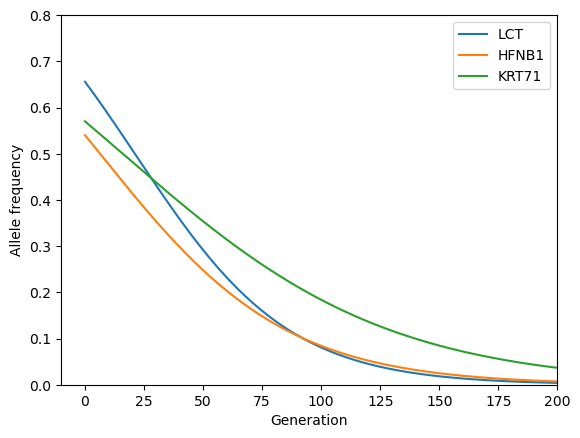

In [41]:
s=0.03158
p=0.655743
Ne=read_Ne('extended.ne')

a,b,c=walk_variant_backward(s,p,Ne,one_step_model='a')
plt.plot(range(len(a)),a,color='tab:blue',linestyle='solid',label='LCT')
# a,b,c=walk_variant_backward(0.0265,p,Ne,one_step_model='a')
# plt.plot(range(len(a)),a,color='tab:blue',linestyle='dashed')
# a,b,c=walk_variant_backward(0.0366,p,Ne,one_step_model='a')
# plt.plot(range(len(a)),a,color='tab:blue',linestyle='dashed')
plt.ylim(0.0,0.8)
plt.xlim(-10,200)
plt.ylabel('Allele frequency')
plt.xlabel('Generation')

p=0.54
s=0.026
a,b,c=walk_variant_backward(s,p,Ne,one_step_model='a')
plt.plot(range(len(a)),a,color='tab:orange',linestyle='solid',label='HFNB1')
# a,b,c=walk_variant_backward(0.0212,p,Ne,one_step_model='a')
# plt.plot(range(len(a)),a,color='tab:orange',linestyle='dashed')
# a,b,c=walk_variant_backward(0.0307,p,Ne,one_step_model='a')
# plt.plot(range(len(a)),a,color='tab:orange',linestyle='dashed')

p=0.57
s=0.018
a,b,c=walk_variant_backward(s,p,Ne,one_step_model='a')
plt.plot(range(len(a)),a,color='tab:green',linestyle='solid',label='KRT71')
# a,b,c=walk_variant_backward(0.012,p,Ne,one_step_model='a')
# plt.plot(range(len(a)),a,color='tab:green',linestyle='dashed')
# a,b,c=walk_variant_backward(0.023,p,Ne,one_step_model='a')
# plt.plot(range(len(a)),a,color='tab:green',linestyle='dashed')

plt.legend()

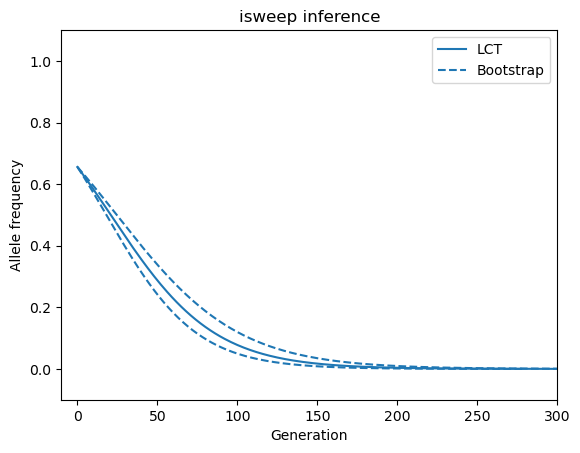

In [21]:
s=0.032
p=0.655743
Ne=read_Ne('../extended.ne')

a,b,c=walk_variant_backward(s,p,Ne,one_step_model='a')
plt.plot(range(len(a)),a,color='tab:blue',linestyle='solid',label='LCT')
a,b,c=walk_variant_backward(0.027,p,Ne,one_step_model='a')
plt.plot(range(len(a)),a,color='tab:blue',linestyle='dashed',label='Bootstrap')
a,b,c=walk_variant_backward(0.037,p,Ne,one_step_model='a')
plt.plot(range(len(a)),a,color='tab:blue',linestyle='dashed')
plt.ylim(-0.10,1.1)
plt.xlim(-10,300)
plt.ylabel('Allele frequency')
plt.xlabel('Generation')
plt.legend()
plt.title('isweep inference')
plt.savefig('lct-example.png',dpi=300)